In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [4]:
pd.set_option('display.max_columns', None)
test = pd.read_csv('Test.csv')
test.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,NaN,50 - 59 %,NaN,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,NaN,NaN,NaN,40 - 49 %,NaN,NaN,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,1.0,NaN,80 - 100 %,60 - 69 %,NaN,NaN,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,1,1,1993,10


# EDA

In [6]:
print(f'The dataset has {train.shape[0]} rows and {train.shape[1]} columns', end='\n\n')
print(f'The dataset has {test.shape[0]} rows and {test.shape[1]} columns', end='\n\n')
print(f'The dataset has {train.isnull().sum().sum()} missing values')

The dataset has 4020 rows and 21 columns

The dataset has 1934 rows and 20 columns

The dataset has 22322 missing values


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

In [8]:
def handle_missing_values(threshold, df):
    for col in df.columns:
        if df[col].isnull().sum() > threshold:
            df.drop(col, axis=1, inplace=True)
    return df

train = handle_missing_values(train.shape[0] * 0.5, train)
test = handle_missing_values(test.shape[0] * 0.5, test)

print(f'The dataset has {train.shape[0]} rows and {train.shape[1]} columns', end='\n\n')
print(f'The dataset has {test.shape[0]} rows and {test.shape[1]} columns', end='\n\n')

def impute_missing(df):
    for col in df.columns:
        # mode for categorical
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        # mean for numerical
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

train = impute_missing(train)
test = impute_missing(test)

print(f'The dataset has {train.shape[0]} rows and {train.shape[1]} columns', end='\n\n')
print(f'The dataset has {test.shape[0]} rows and {test.shape[1]} columns', end='\n\n')

The dataset has 4020 rows and 17 columns

The dataset has 1934 rows and 15 columns

The dataset has 4020 rows and 17 columns

The dataset has 1934 rows and 15 columns



In [9]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [10]:
train.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile',
       'Additional_lang', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth',
       'Target'],
      dtype='object')

In [11]:
test.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth'],
      dtype='object')

## Visualizations

In [14]:
train['Female'].value_counts()

1    2269
0    1751
Name: Female, dtype: int64

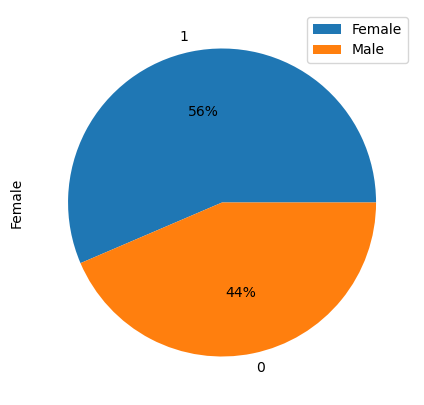

In [23]:
train['Female'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10, 5))
# # where 0 is male and 1 is female
# Replace labels with names ie male and female
plt.legend(['Female', 'Male'], loc='upper right')
plt.show();

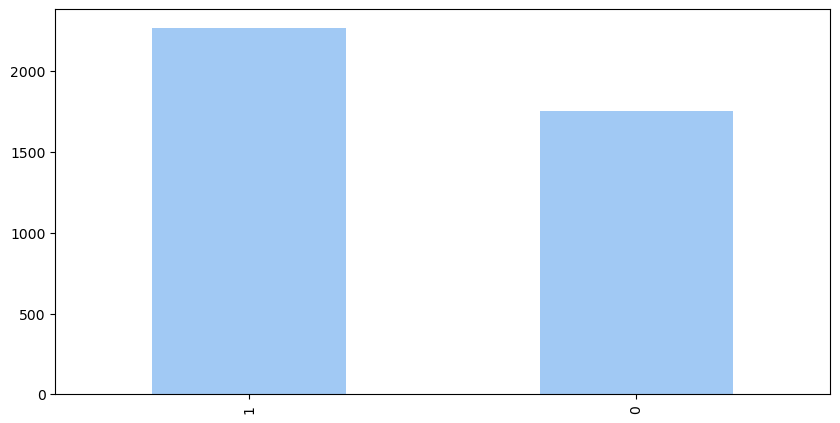

In [28]:
# Add emploment status as hue
train['Female'].value_counts().plot(kind='bar', figsize=(10, 5))
sns.set_palette('pastel')

<Axes: >

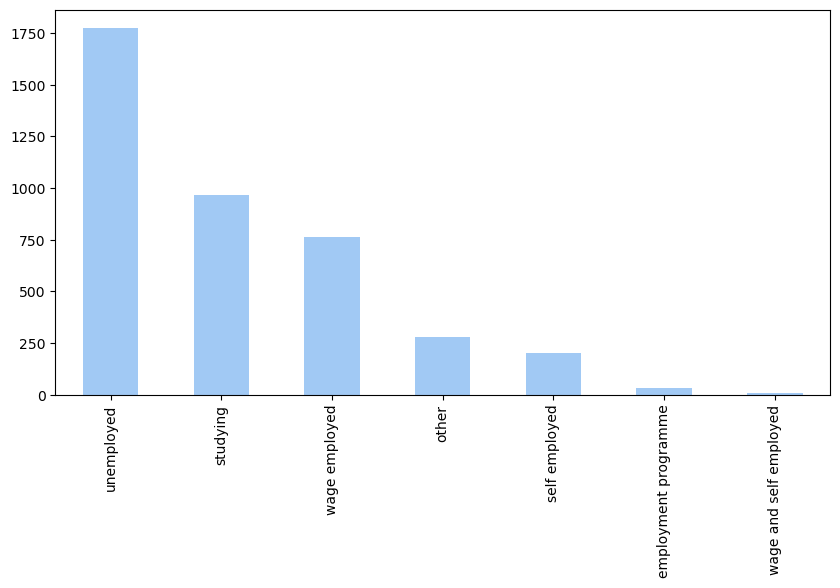

In [29]:
train['Status'].value_counts().plot(kind='bar', figsize=(10, 5))

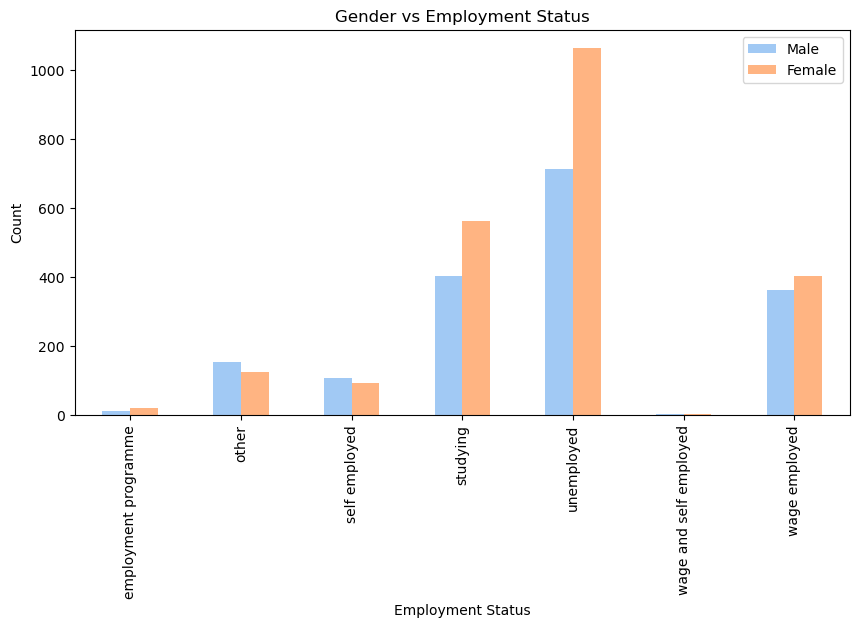

In [34]:
# How does unemployment and gender relate?
gender_status = train['Female'].groupby(train['Status']).value_counts().unstack()
gender_status.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Gender vs Employment Status')
plt.legend(['Male', 'Female'], loc='upper right')
plt.show();

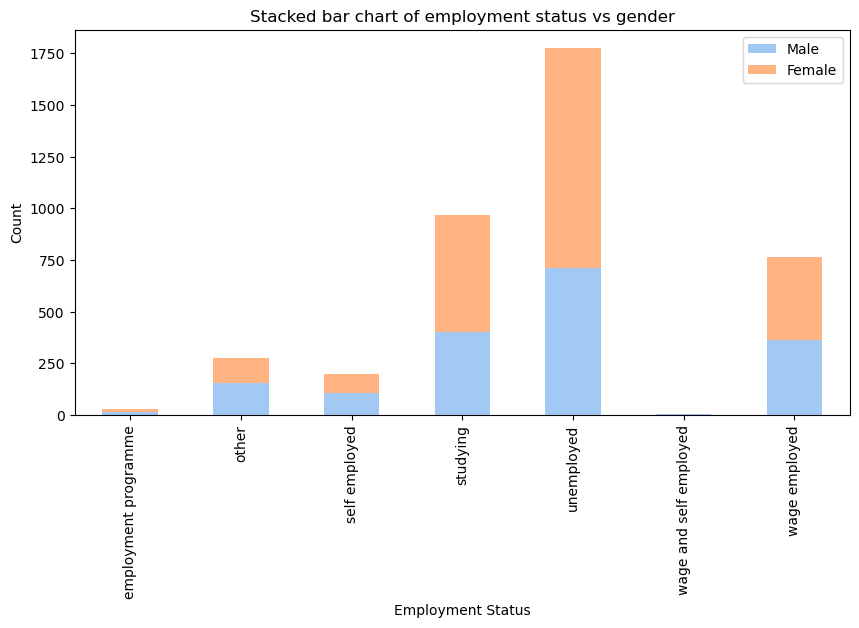

In [35]:
gender_status.plot(kind='bar', figsize=(10, 5), stacked=True)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Stacked bar chart of employment status vs gender')
plt.legend(['Male', 'Female'], loc='upper right')
plt.show();

<Axes: >

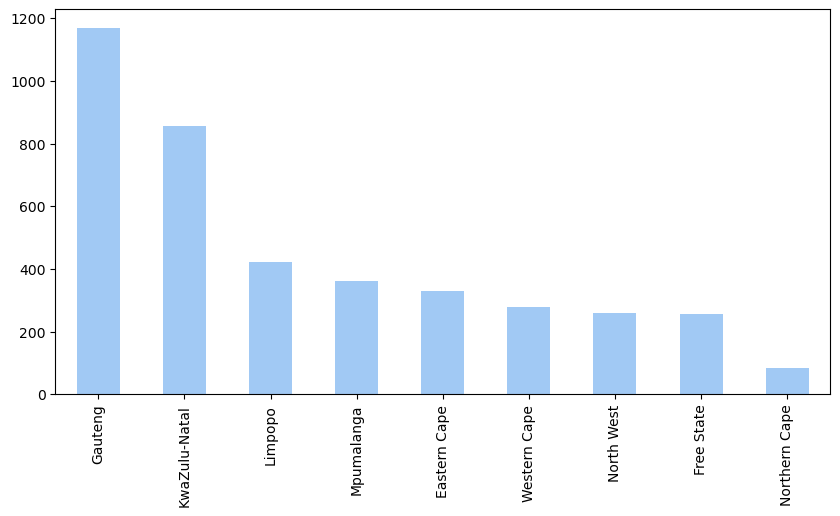

In [36]:
train['Province'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: >

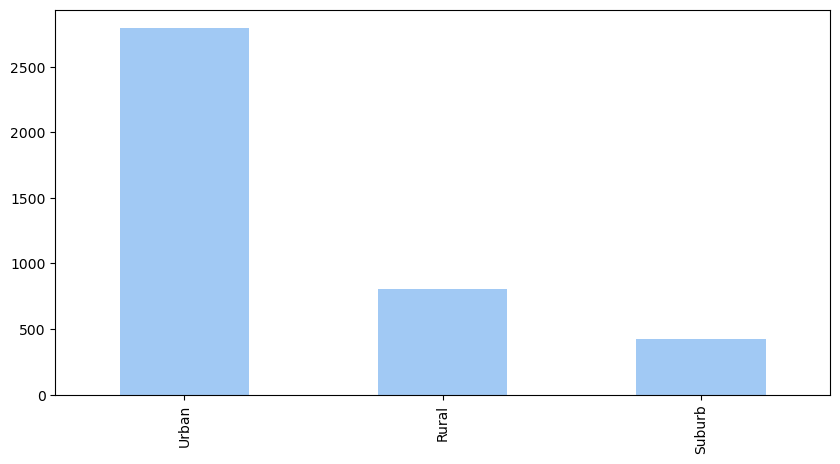

In [37]:
train['Geography'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Status'>

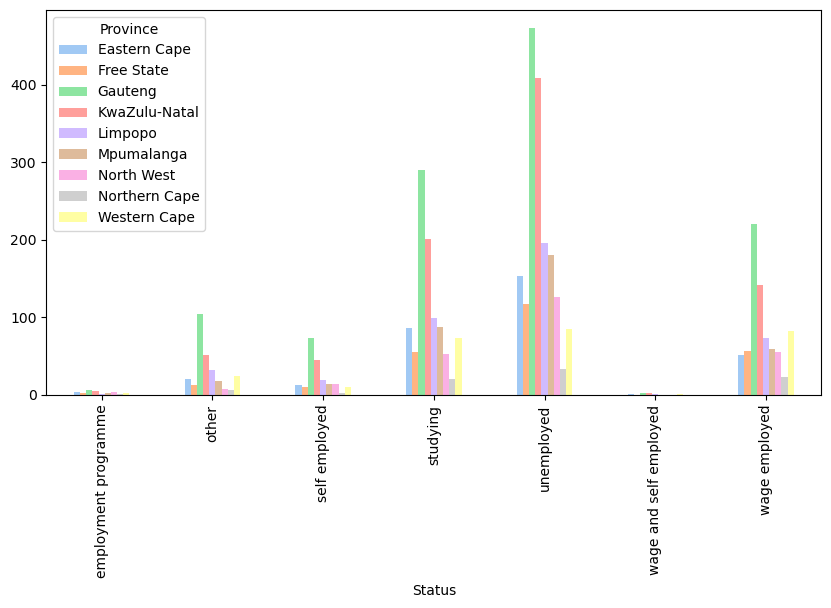

In [38]:
# Province vs employment status
province_status = train['Province'].groupby(train['Status']).value_counts().unstack()
province_status.plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Status'>

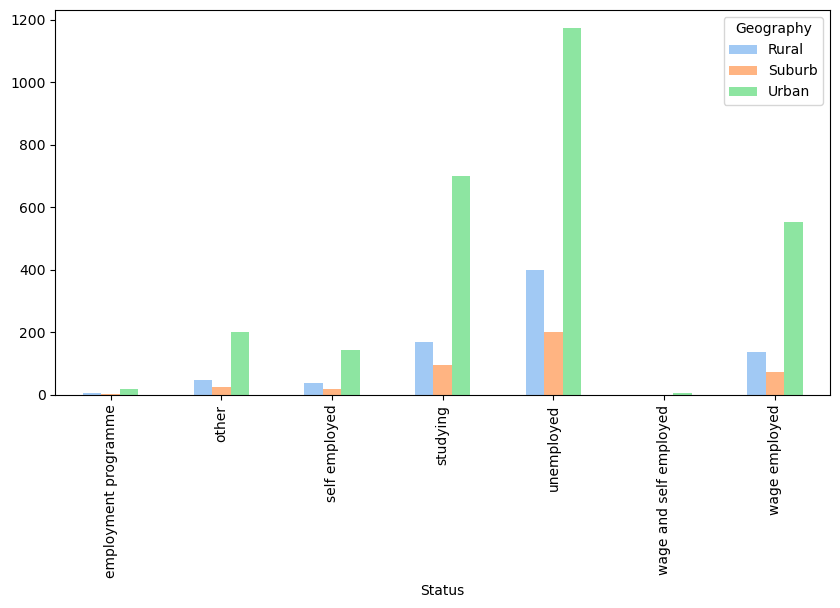

In [39]:
# Geography vs employment status
geo_status = train['Geography'].groupby(train['Status']).value_counts().unstack()
geo_status.plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Geography'>

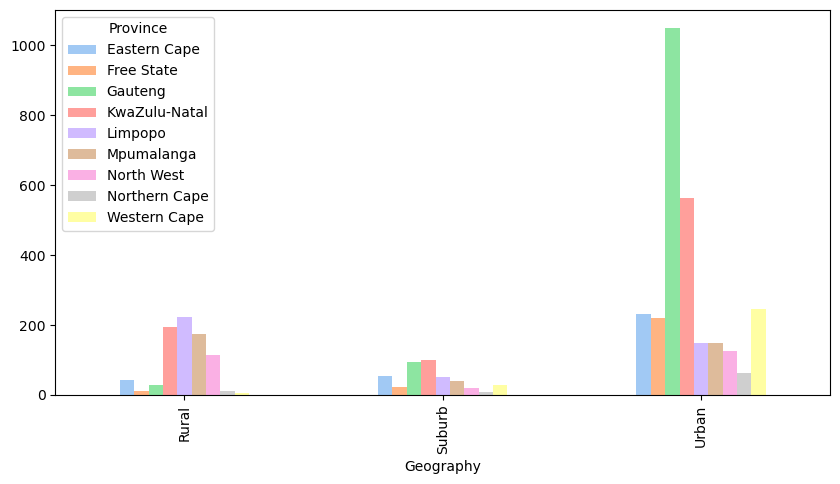

In [43]:
# Province vs geography
prov_geo = train['Province'].groupby(train['Geography']).value_counts().unstack()
prov_geo.plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Diploma'>

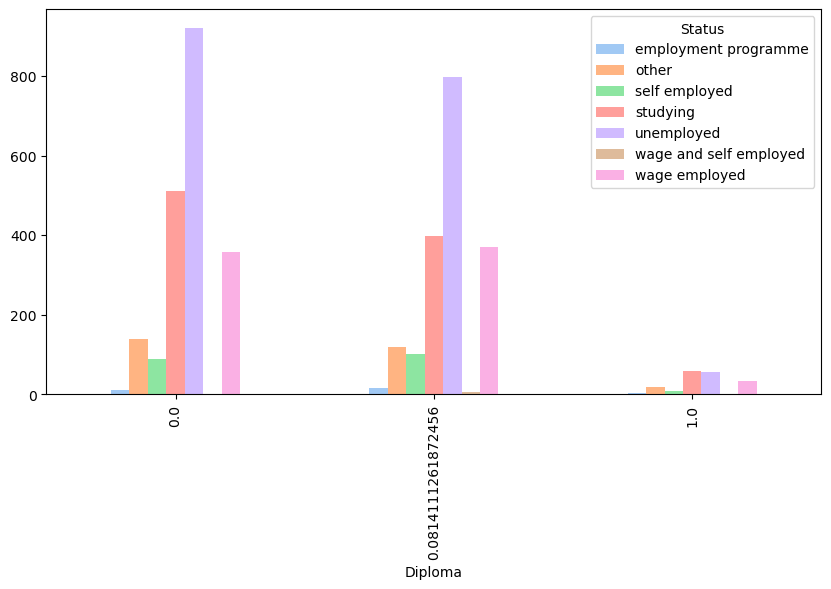

In [46]:
# Status vs education (diploma and degree columns)
status_edu = train['Status'].groupby(train['Diploma']).value_counts().unstack()
status_edu.plot(kind='bar', figsize=(10, 5))

In [47]:
train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Additional_lang,Female,Sa_citizen,Birthyear,Birthmonth,Target,Education
0,Id_eqz61wz7yn,2022-02-23,2,studying,582.883092,Rural,Mpumalanga,1.000000,0.000000,0.000000,3.000000,50 - 59 %,1,1,2000,5,0,0.000000
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.000000,Suburb,North West,1.000000,0.000000,0.000000,1.000000,40 - 49 %,1,1,1989,4,1,0.000000
2,Id_9h0isj38y4,2022-08-08,3,other,582.883092,Urban,Free State,1.000000,0.000000,0.000000,2.696482,40 - 49 %,0,1,1996,7,1,0.000000
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.000000,Urban,Eastern Cape,0.850598,0.078118,0.081411,2.696482,50 - 59 %,0,1,2000,1,0,0.159529
4,Id_g4elxibjej,2023-03-22,4,studying,582.883092,Urban,Limpopo,0.850598,0.078118,0.081411,2.696482,50 - 59 %,1,1,1998,12,0,0.159529


<Axes: >

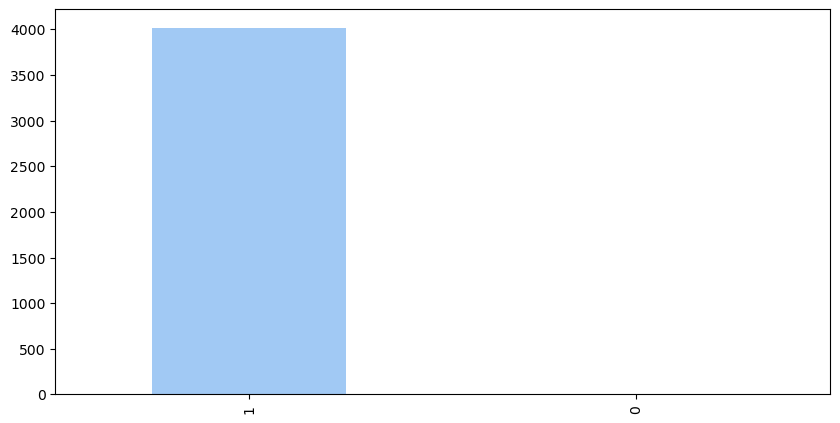

In [48]:
train['Sa_citizen'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: >

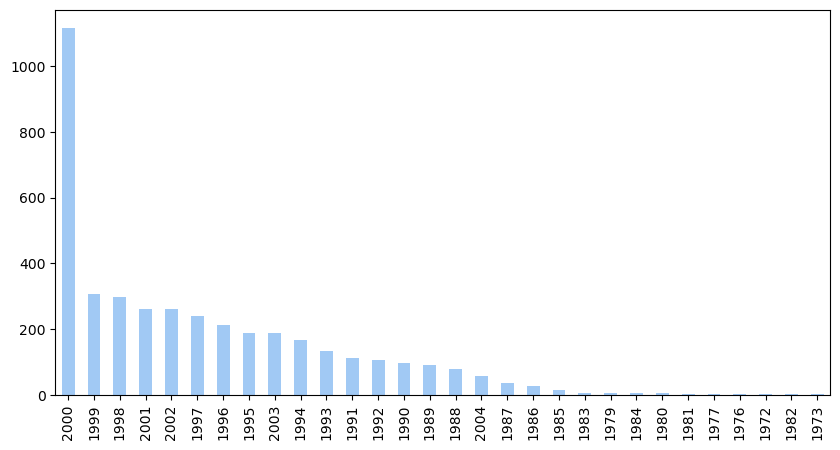

In [49]:
# Which year were majority of the people born?
train['Birthyear'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Female'>

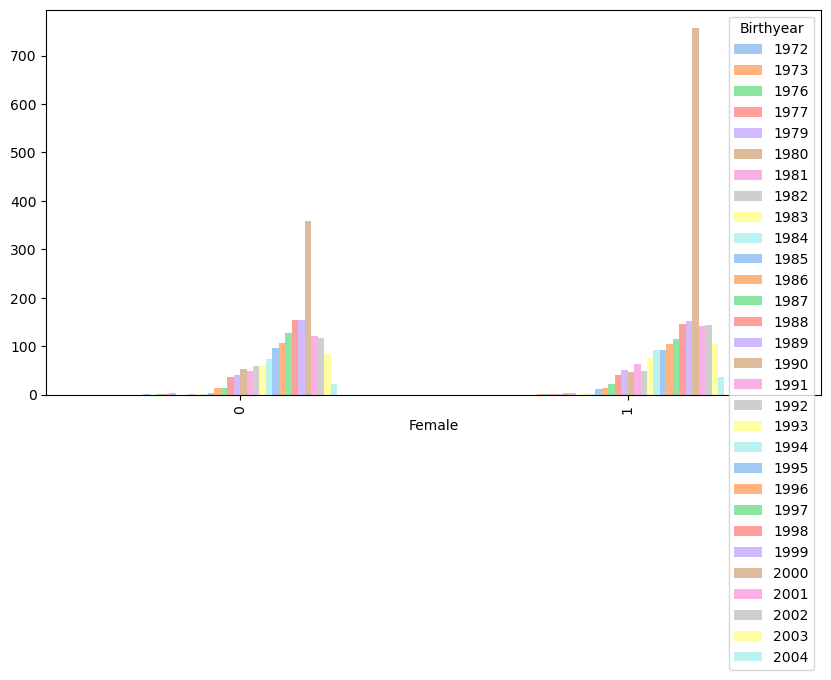

In [51]:
birthyear_gender = train['Birthyear'].groupby(train['Female']).value_counts().unstack()
birthyear_gender.plot(kind='bar', figsize=(10, 5))

In [52]:
# Drop the % in the column names
train.columns = train.columns.str.replace('%', '')
train.rename(columns={'Additional_lang': 'Additional_lang (%)'}, inplace=True)
train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Additional_lang (%),Female,Sa_citizen,Birthyear,Birthmonth,Target,Education
0,Id_eqz61wz7yn,2022-02-23,2,studying,582.883092,Rural,Mpumalanga,1.000000,0.000000,0.000000,3.000000,50 - 59 %,1,1,2000,5,0,0.000000
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.000000,Suburb,North West,1.000000,0.000000,0.000000,1.000000,40 - 49 %,1,1,1989,4,1,0.000000
2,Id_9h0isj38y4,2022-08-08,3,other,582.883092,Urban,Free State,1.000000,0.000000,0.000000,2.696482,40 - 49 %,0,1,1996,7,1,0.000000
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.000000,Urban,Eastern Cape,0.850598,0.078118,0.081411,2.696482,50 - 59 %,0,1,2000,1,0,0.159529
4,Id_g4elxibjej,2023-03-22,4,studying,582.883092,Urban,Limpopo,0.850598,0.078118,0.081411,2.696482,50 - 59 %,1,1,1998,12,0,0.159529


<Axes: xlabel='Target', ylabel='Density'>

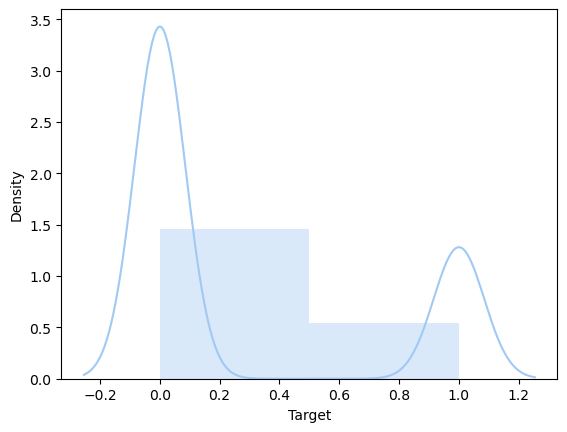

In [53]:
# target distribution
sns.distplot(train['Target'], bins=2)

<Axes: >

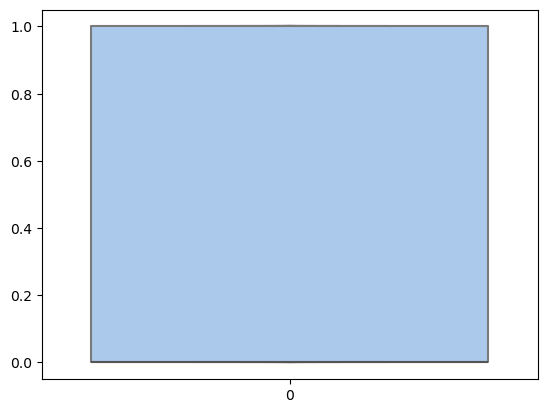

In [54]:
sns.boxenplot(train['Target'])

<Axes: >

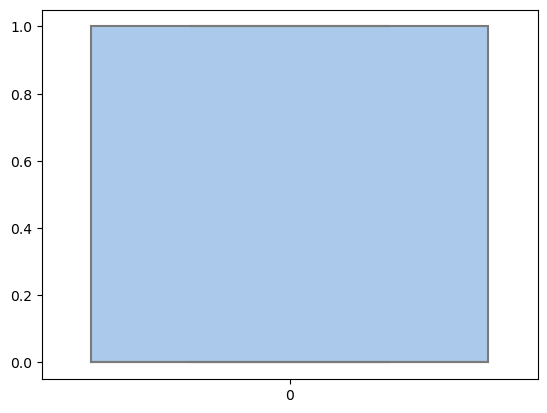

In [55]:
sns.boxplot(train['Target'])

<Axes: xlabel='Target', ylabel='Density'>

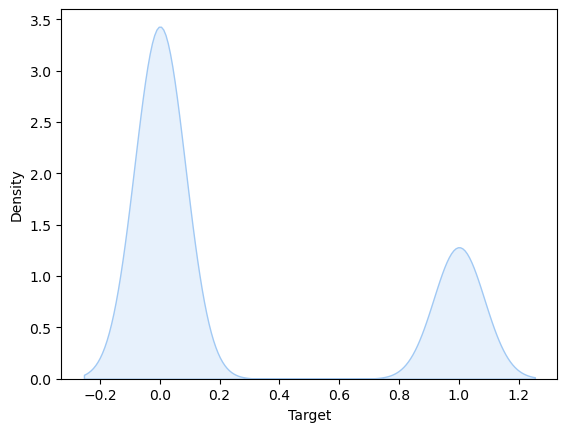

In [56]:
sns.kdeplot(train['Target'], shade=True)

<Axes: >

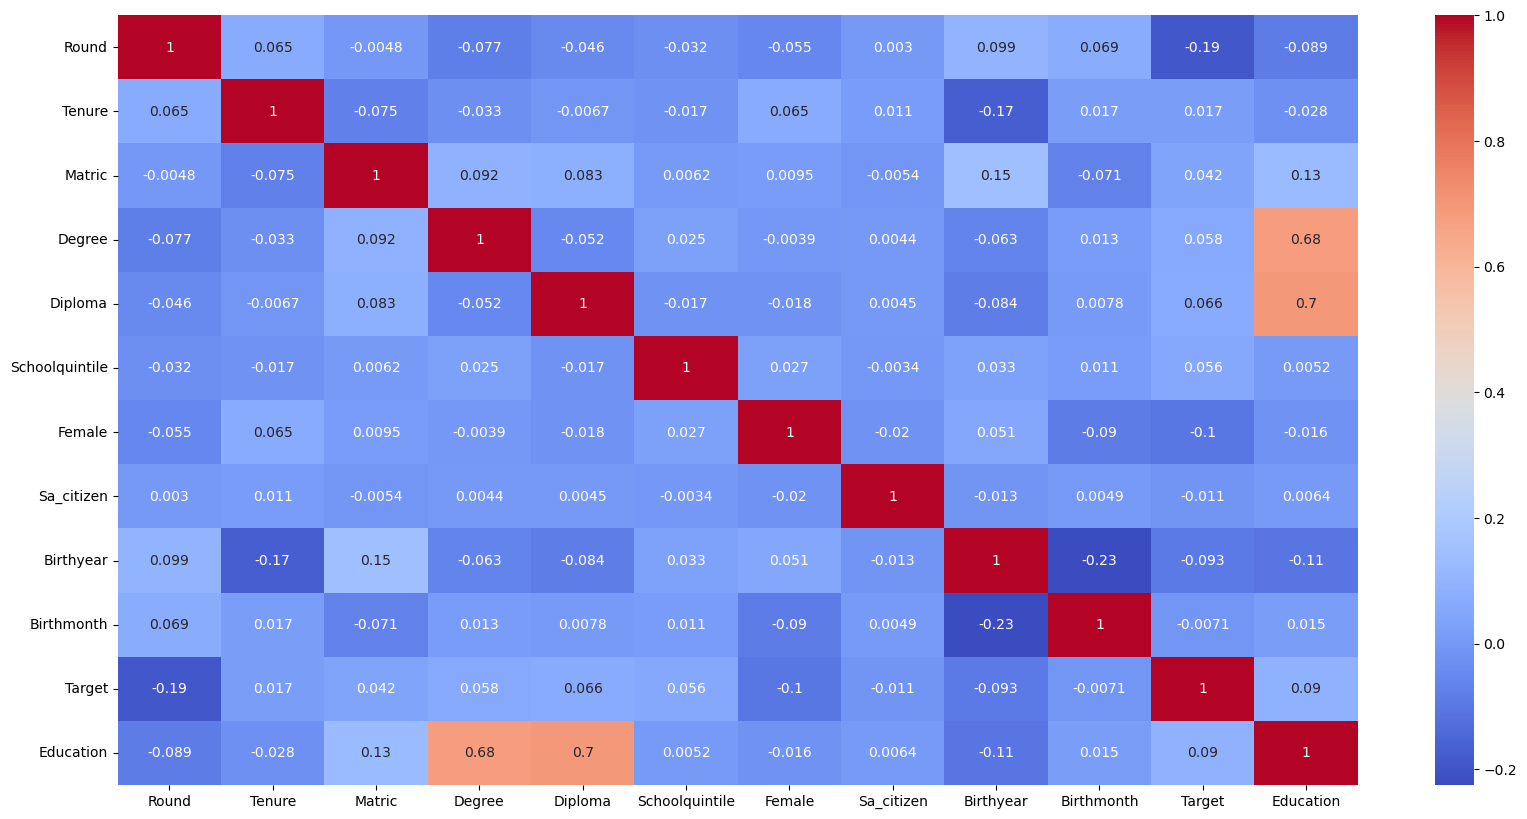

In [58]:
corr = train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [59]:
train.corr()['Target'].sort_values(ascending=False)

Target            1.000000
Education         0.089976
Diploma           0.066233
Degree            0.057580
Schoolquintile    0.056199
Matric            0.042449
Tenure            0.016681
Birthmonth       -0.007056
Sa_citizen       -0.011438
Birthyear        -0.093354
Female           -0.103646
Round            -0.192630
Name: Target, dtype: float64

In [62]:
high_corr_features = train.corr()['Target'].sort_values(ascending=False).head(10).index
# drop the target column
high_corr_features = high_corr_features.drop('Target')
high_corr_features

Index(['Education', 'Diploma', 'Degree', 'Schoolquintile', 'Matric', 'Tenure',
       'Birthmonth', 'Sa_citizen', 'Birthyear'],
      dtype='object')

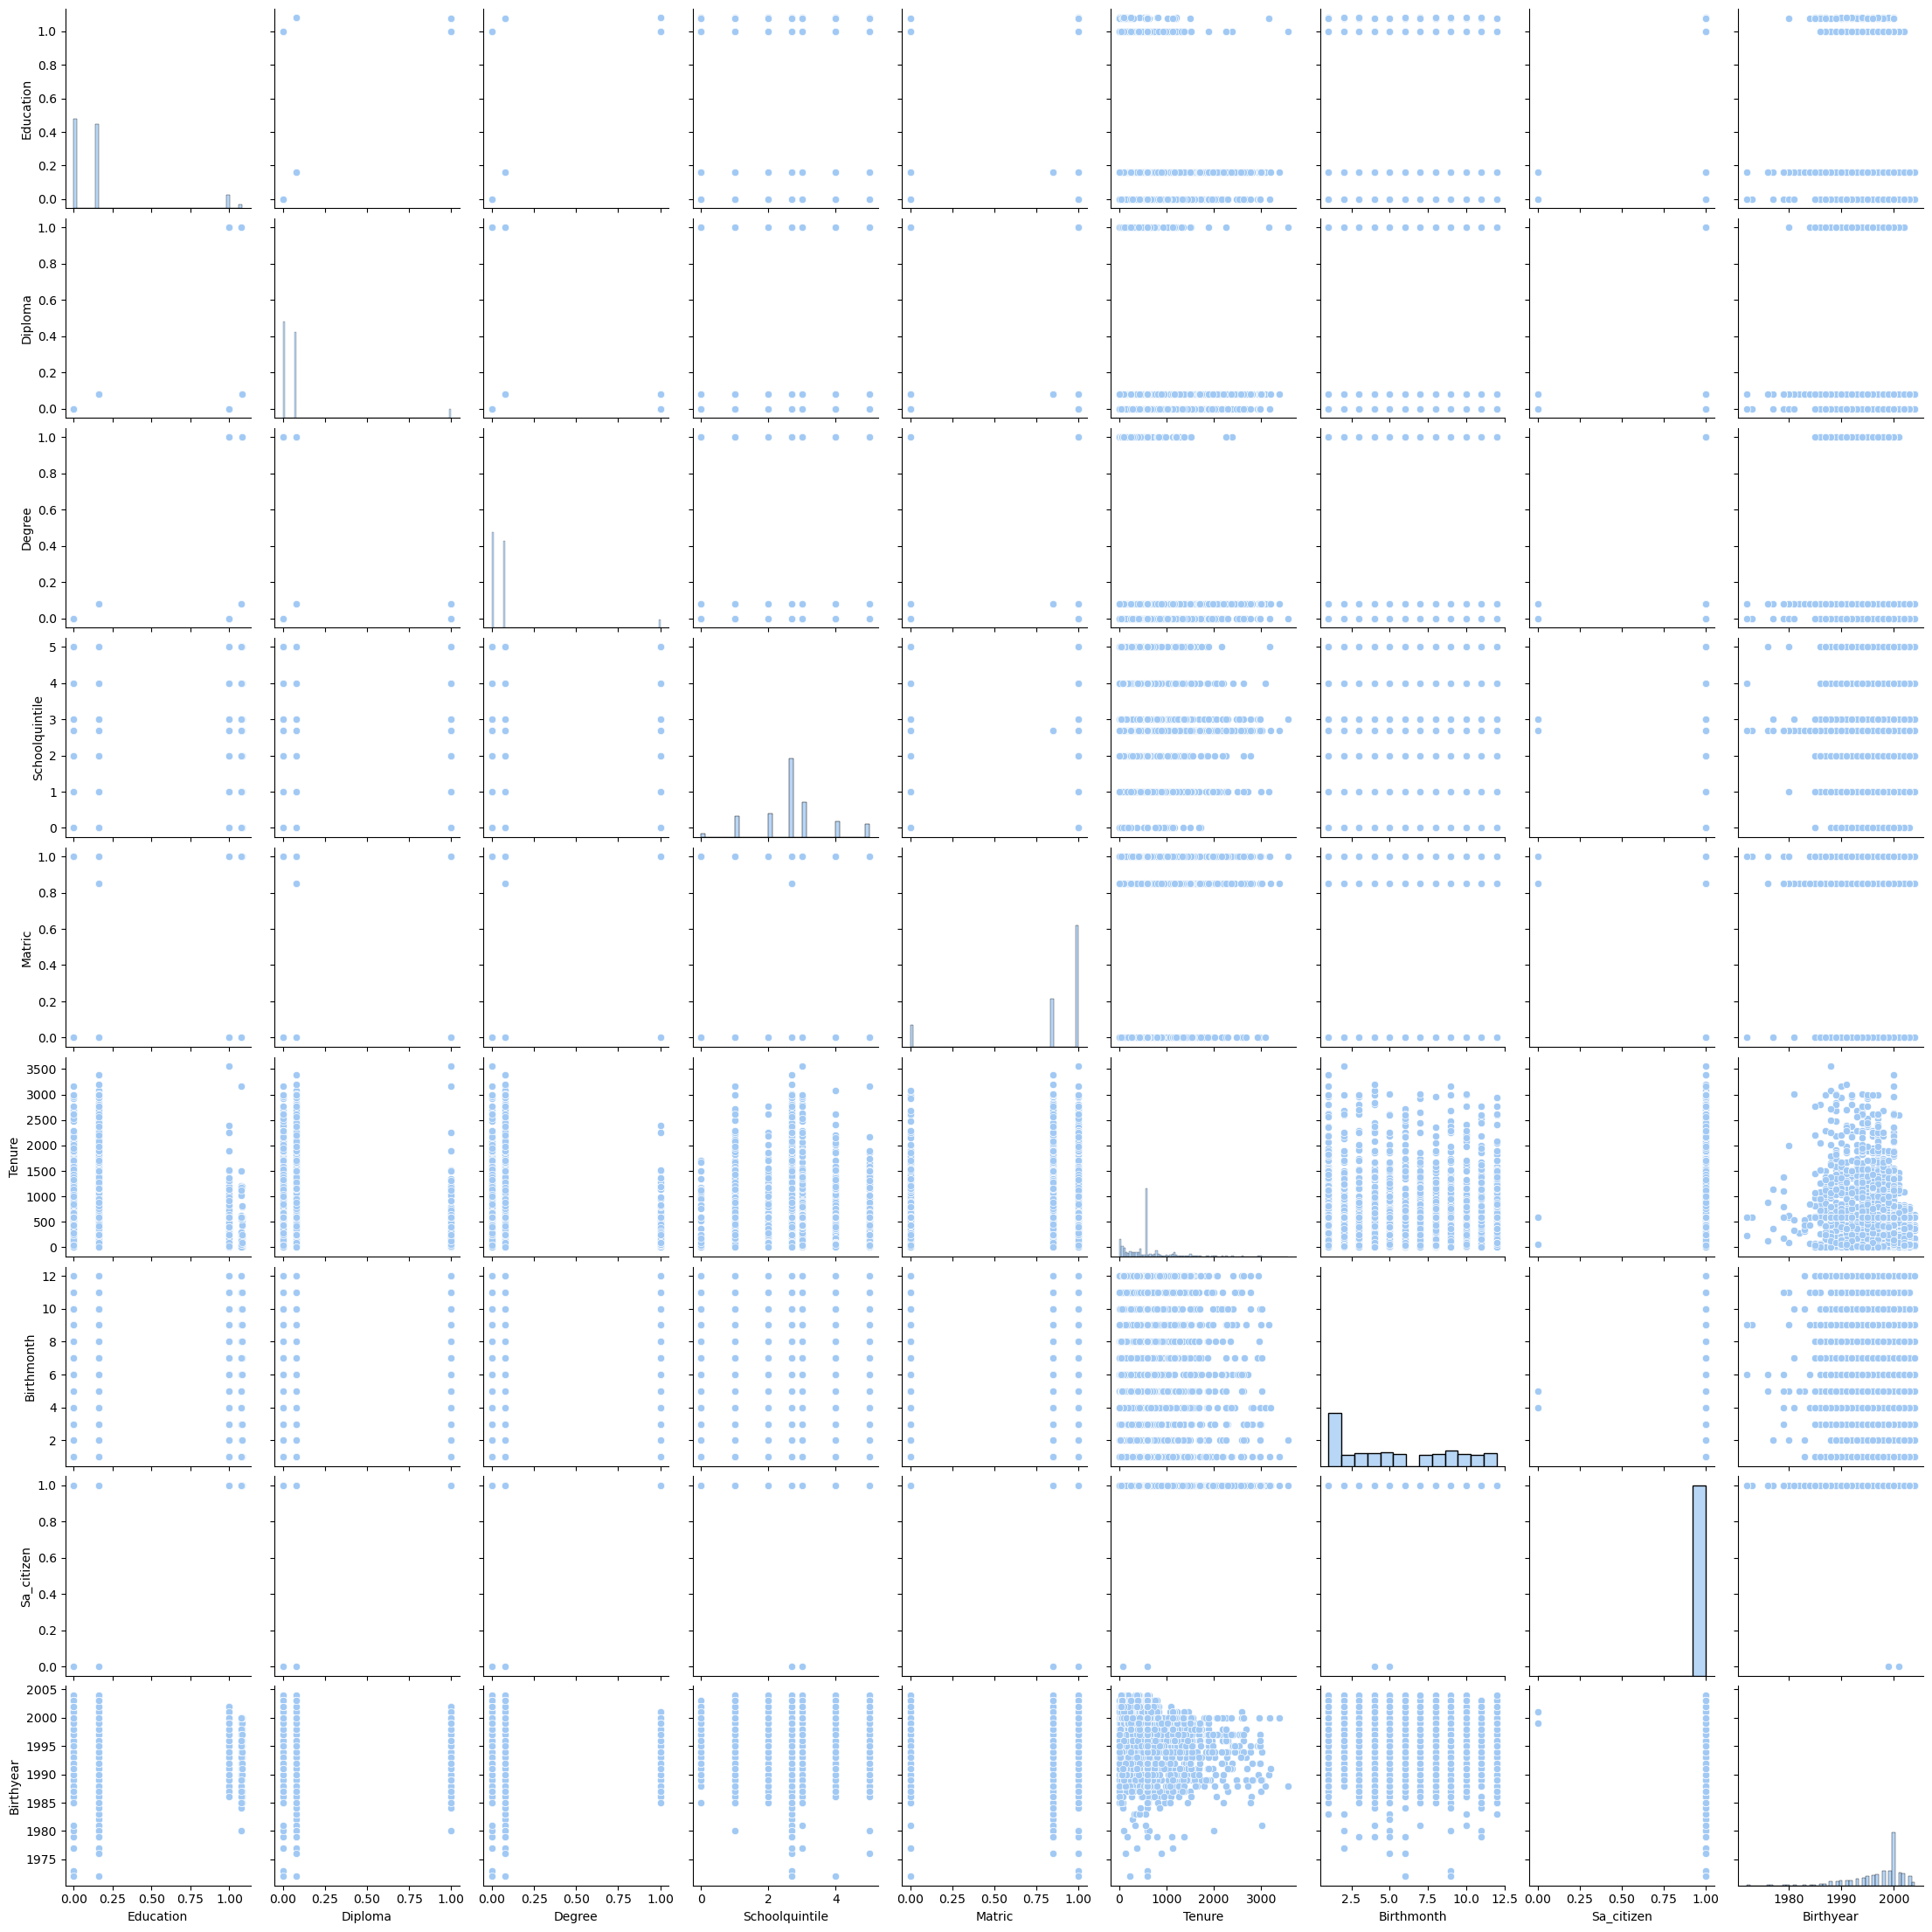

In [63]:
sns.pairplot(train[high_corr_features])

# Modelling

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       576
           1       0.25      0.01      0.02       228

    accuracy                           0.71       804
   macro avg       0.48      0.50      0.42       804
weighted avg       0.58      0.71      0.60       804

[[570   6]
 [226   2]]
0.7114427860696517
0.4991776315789474


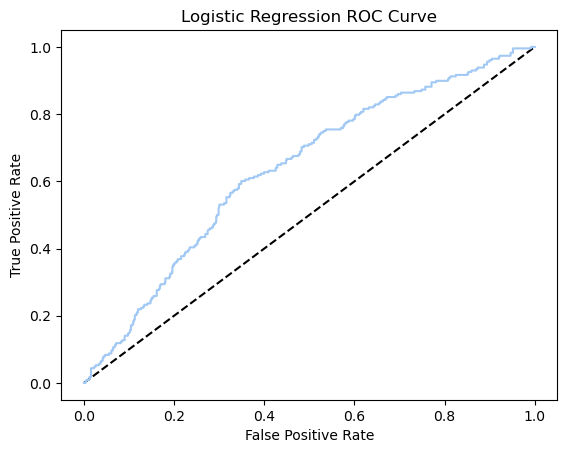

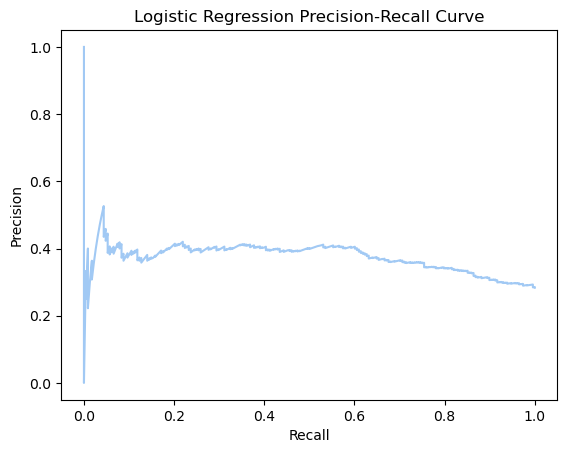

TypeError: ConfusionMatrixDisplay.__init__() takes 2 positional arguments but 4 were given

In [72]:
X = train[high_corr_features.tolist() + ['Province', 'Geography']]
X = pd.get_dummies(X, drop_first=True)
y = train['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

# Plot the ROC curve
from sklearn.metrics import roc_curve
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

# plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show();

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(log_model, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show();


In [74]:
test['Education'] = test['Diploma'] + test['Degree']
test = test[high_corr_features.tolist() + ['Province', 'Geography']]
test = pd.get_dummies(test, drop_first=True)
test.head()

test = scaler.transform(test)

test_pred = log_model.predict(test)
sample = pd.read_csv('SampleSubmission.csv')

sample['Target'] = test_pred
sample.head()

sample.to_csv('log_model.csv', index=False)

In [77]:
sample.to_csv('log_model.csv', index=False)

In [76]:
sample.head()

,Person_id,Target
0,Id_r90136smvl,0
1,Id_wawdqhmu6s,0
2,Id_ap2czff2bu,0
3,Id_uhgink7iha,0
4,Id_5j6bzk3k81,0


In [75]:
sample['Target'].value_counts()

0    1909
1      25
Name: Target, dtype: int64